In [1]:
# Figuring out the cSPARC .cs file format

import numpy as np
import matplotlib.pyplot as plt

# For a non-memory-mapped array
data = np.fromfile('./csparc/J5_particles.cs', dtype=float)  # Specify the data type explicitly

# Reshape the data to match the type_info structure
print(data)
print(f"Data type: {data.dtype}")
print(f"Shape: {data.shape}")




[ 1.87585069e-309  1.17119999e+171  2.17320469e+256 ... -5.44548480e+007
  2.87379102e+003  1.15382160e+007]
Data type: float64
Shape: (7675692,)


In [23]:
import numpy as np
import re

try:
    # Load the data
    data = np.load('./csparc/J5_particles.cs')
    
    if isinstance(data, np.ndarray) and data.dtype.names is not None:
        print("Column Headers:")
        print(data.dtype.names)
    else:
        print("The file does not contain structured array headers.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

# Print the first few rows
print("First few rows of data:")
print(data[:5])
print("Check to see if it is the same particle order as the cryoDRGN")
print(data[65000:65010])

print(f"Data type: {data.dtype}")
print(f"Shape: {data.shape}")

# Extract component values from each mode
components_mode0 = data['components_mode_0/value']
components_mode1 = data['components_mode_1/value']
components_mode2 = data['components_mode_2/value']

# Stack the three components along a new axis to form a 3D vector for each row
components_vectors = np.stack([components_mode0, components_mode1, components_mode2], axis=1)

# test to see if it works
print("Shape of components_vectors:", components_vectors.shape)
print("\nFirst latent space vectors:")
print(components_vectors[:5])










Column Headers:
('uid', 'blob/path', 'blob/idx', 'blob/shape', 'blob/psize_A', 'blob/sign', 'blob/import_sig', 'ctf/type', 'ctf/exp_group_id', 'ctf/accel_kv', 'ctf/cs_mm', 'ctf/amp_contrast', 'ctf/df1_A', 'ctf/df2_A', 'ctf/df_angle_rad', 'ctf/phase_shift_rad', 'ctf/scale', 'ctf/scale_const', 'ctf/shift_A', 'ctf/tilt_A', 'ctf/trefoil_A', 'ctf/tetra_A', 'ctf/anisomag', 'ctf/bfactor', 'alignments3D/split', 'alignments3D/shift', 'alignments3D/pose', 'alignments3D/psize_A', 'alignments3D/error', 'alignments3D/error_min', 'alignments3D/resid_pow', 'alignments3D/slice_pow', 'alignments3D/image_pow', 'alignments3D/cross_cor', 'alignments3D/alpha', 'alignments3D/alpha_min', 'alignments3D/weight', 'alignments3D/pose_ess', 'alignments3D/shift_ess', 'alignments3D/class_posterior', 'alignments3D/class', 'alignments3D/class_ess', 'components_mode_0/component', 'components_mode_0/value', 'components_mode_1/component', 'components_mode_1/value', 'components_mode_2/component', 'components_mode_2/value'

In [ ]:
import numpy as np
import re

def extract_latent_space_vectors(structured_array):
    """
    Extracts component values from different modes and combines them into vectors.
    
    Parameters:
        - structured_array: A structured NumPy array containing component data.
        
    Returns:
        An n-dimensional numpy ndarray where each row is a vector of components from each mode.
    """
    # Identify all columns matching the pattern 'component_mode_X/value'
    component_columns = [col for col in structured_array.dtype.names if re.match(r'components_mode_\d+/value', col)]
    
    if not component_columns:
        raise ValueError("No component columns found in the structured array.")
    
    # Extract values from each identified column
    components = []
    for col in component_columns:
        # Extract the mode number from the column name
        mode_number = int(re.search(r'\d+', col).group())
        # Append the component values to the list
        components.append(structured_array[col])
    
    # Stack the component arrays along a new axis to form vectors
    stacked_components = np.stack(components, axis=1)
    
    return stacked_components

# Example usage:
# Load your structured array (replace 'your_data.cs' with your actual file path)


# Extract components into vectors
z = extract_latent_space_vectors(data) 
print("Shape of the resulting array:", vectors.shape)
print("First few vectors:\n", vectors[:5, :])



Shape of the resulting array: (204000, 3)
First few vectors:
 [[  4.313564     0.18090291  14.417008  ]
 [ -9.816204     0.55391073  19.83682   ]
 [  3.376438    -9.19242    -10.831564  ]
 [  8.767656   -17.861256    -8.996669  ]
 [ 10.994852    -1.976301    19.628567  ]]


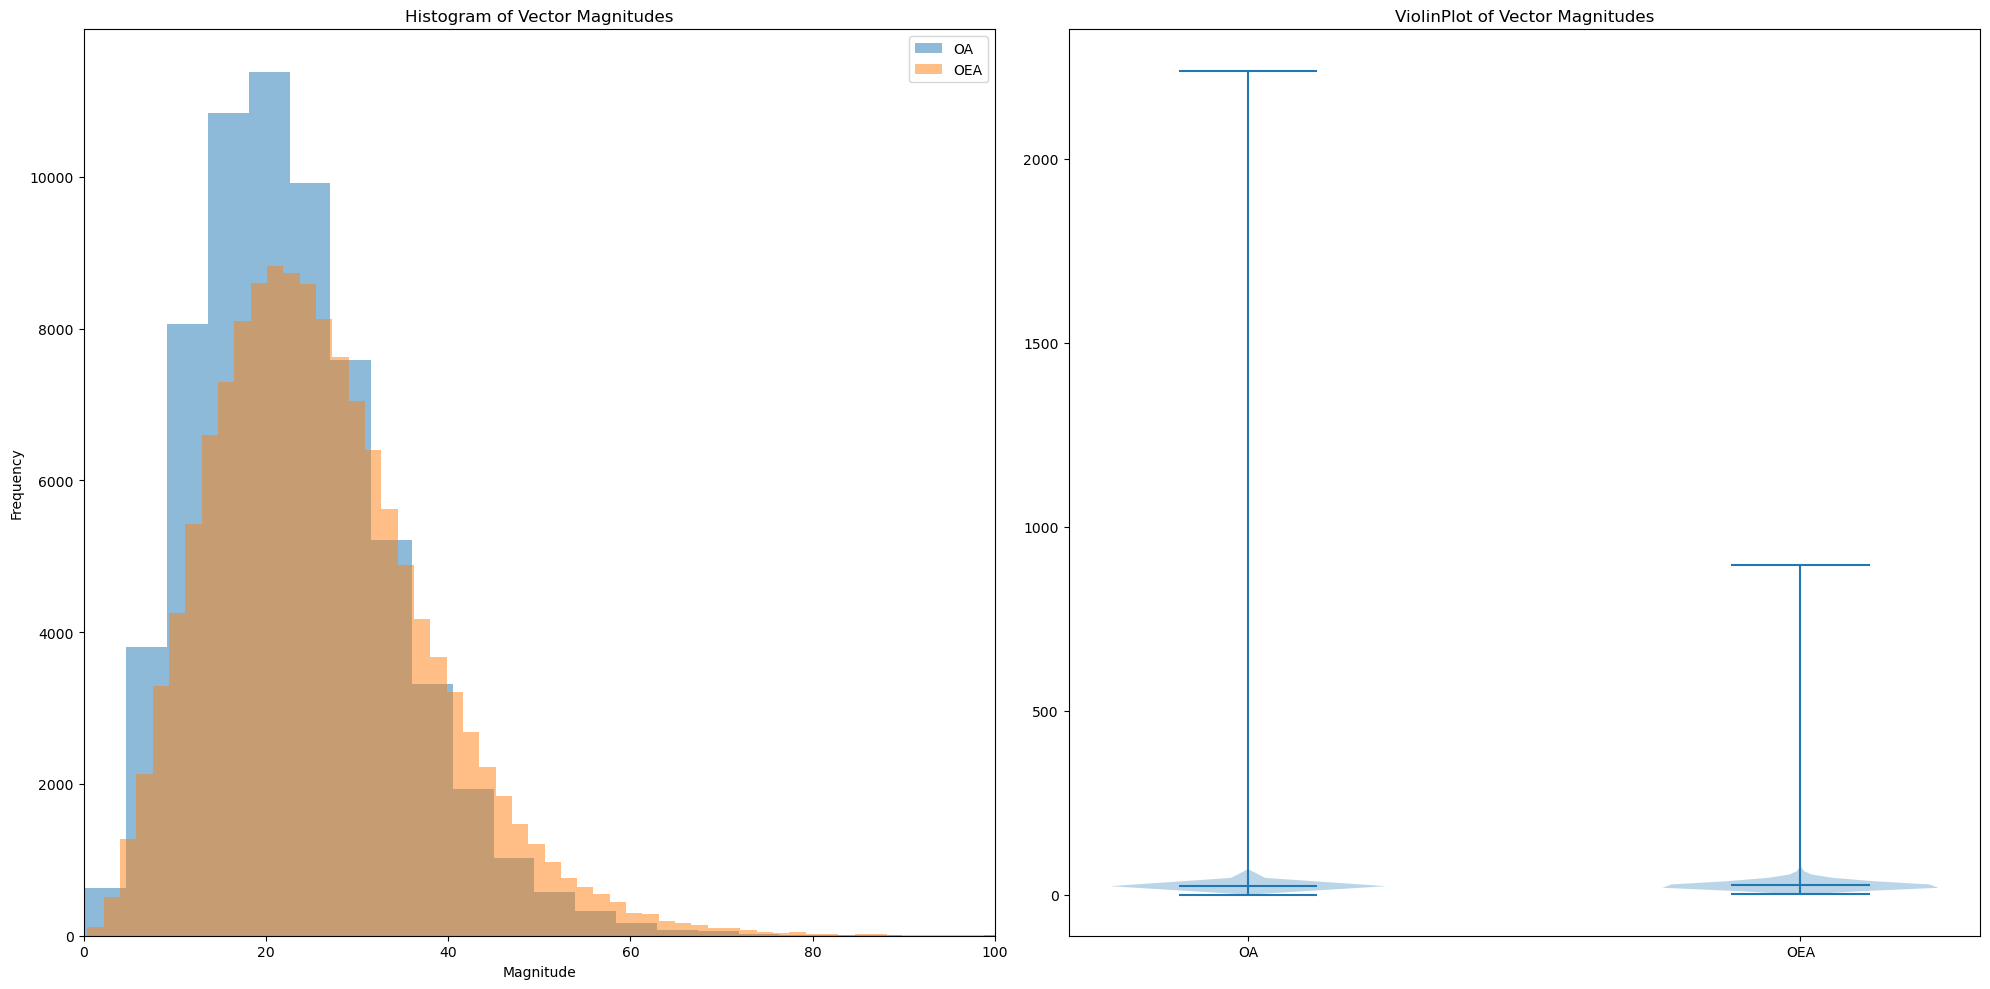

T-test
T-Statistic: -45.407169497449054
P-Value: 0.0
Mann-Whitney U-Test
U-Statistic: 3857613051.0
P-Value: 0.0
ANOVA Test
F-Statistic: 2061.8083
P-Value: 0.0
Mean OA Magnitude: 23.1689 SD 15.18315
Mean OEA Magnitude: 26.101082 SD 12.77672


In [25]:
# Looking firstly at latent space vector magnitudes.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Separate the first 65,000 entries
OA = z[:65000]
OEA = z[65000:]

# Calculate the magnitude of each vector in your dataset
OA_magnitudes = np.linalg.norm(OA, ord=2, axis=1)
OEA_magnitudes = np.linalg.norm(OEA, ord=2, axis=1)



# Plot histograms for both subsets
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(OA_magnitudes, bins=500, alpha=0.5, label='OA')
plt.hist(OEA_magnitudes, bins=500, alpha=0.5, label='OEA')
#plt.hist(OEA_magnitudes, bins=500,  alpha=0.5,label='OEA', color='orange')   
plt.title('Histogram of Vector Magnitudes')
plt.xlabel('Magnitude')
plt.xlim(0,100)
#plt.ylim(0, 6000)
plt.ylabel('Frequency')
plt.legend()

# Boxplot for both subsets
plt.subplot(1,2,2)
plt.violinplot([OA_magnitudes, OEA_magnitudes], showmeans=True)
plt.title('ViolinPlot of Vector Magnitudes')
plt.xticks([1, 2], ['OA', 'OEA'])

plt.tight_layout()

plt.show()

# Perform t-test to compare means of both subsets
t_stat, p_value = stats.ttest_ind(OA_magnitudes, OEA_magnitudes)
print('T-test')
print('T-Statistic:', t_stat)
print('P-Value:', p_value)

u_stat, p_value = stats.mannwhitneyu(OA_magnitudes, OEA_magnitudes, alternative='two-sided')
print('Mann-Whitney U-Test')
print('U-Statistic:', u_stat)
print('P-Value:', p_value)

f_stat, p_value = stats.f_oneway(OA_magnitudes, OEA_magnitudes)
print('ANOVA Test')
print('F-Statistic:', f_stat)
print('P-Value:', p_value)

mean_OA = np.mean(OA_magnitudes)
mean_OEA = np.mean(OEA_magnitudes)
print('Mean OA Magnitude:', mean_OA, 'SD', np.std(OA_magnitudes))
print('Mean OEA Magnitude:', mean_OEA, 'SD', np.std(OEA_magnitudes))







In [ ]:
import umap
from pathlib import Path
import joblib

# Create a function to perform UMAP and save the results in a .pkl file
def perform_and_save_umap(data, filename):
    if filename.exists():
        print("Loading UMAP embeddings from disk...")
        data_umap = joblib.load(filename)
    else:
        print("Performing UMAP and saving the results to disk...")
        umap_reducer = umap.UMAP(n_components=2, metric='euclidean', min_dist=0.1, n_neighbors=50, spread=1.5, learning_rate=0.5, negative_sample_rate=10, init='pca', random_state=42)
        data_umap = umap_reducer.fit_transform(data)
        joblib.dump(data_umap, filename)
    return data_umap

# Define filenames for the UMAP embeddings
#filename_OA_subset_A = Path("umap_embeddings_OA_subset_A.pkl")
#filename_OA_subset_B = Path("umap_embeddings_OA_subset_B.pkl")
#filename_OEA_subset_A = Path("umap_embeddings_OEA_subset_A.pkl")
#filename_OEA_subset_B = Path("umap_embeddings_OEA_subset_B.pkl")
filename_OA = Path("umap_embeddings_OA.pkl")
filename_OEA = Path("umap_embeddings_OEA.pkl")

# Perform UMAP on subsets and save the results to disk
data_umap_OA_subset_A = perform_and_save_umap(OA_subset_A, filename_OA_subset_A)
data_umap_OA_subset_B = perform_and_save_umap(OA_subset_B, filename_OA_subset_B)
data_umap_OEA_subset_A = perform_and_save_umap(OEA_subset_A, filename_OEA_subset_A)
data_umap_OEA_subset_B = perform_and_save_umap(OEA_subset_B, filename_OEA_subset_B)
data_umap_OA = perform_and_save_umap(OA, filename_OA)
data_umap_OEA = perform_and_save_umap(OEA, filename_OEA)
